In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from datetime import datetime as dt
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
df_gps = pd.read_json('C:/Users/Romansya/Loc history/LocHistory.json')
print('There are {:,} rows in the location history dataset'.format(len(df_gps)))

There are 939,301 rows in the location history dataset


In [3]:
# parse lat, lon, and timestamp from the dict inside the locations column
df_gps['lat'] = df_gps['locations'].map(lambda x: x['latitudeE7'])
df_gps['lon'] = df_gps['locations'].map(lambda x: x['longitudeE7'])
df_gps['timestamp_ms'] = df_gps['locations'].map(lambda x: x['timestampMs'])

# convert lat/lon to decimalized degrees and the timestamp to date-time
df_gps['lat'] = df_gps['lat'] / 10.**7
df_gps['lon'] = df_gps['lon'] / 10.**7
df_gps['timestamp_ms'] = df_gps['timestamp_ms'].astype(float) / 1000
df_gps['datetime'] = df_gps['timestamp_ms'].map(lambda x: dt.fromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))
date_range = '{}-{}'.format(df_gps['datetime'].min()[:4], df_gps['datetime'].max()[:4])

In [4]:
# drop columns we don't need, then show a slice of the dataframe
df_gps = df_gps.drop(labels=['locations', 'timestamp_ms'], axis=1, inplace=False)
#df_gps[1000:1005]

Mapping the entire dataset

In [54]:
# define map colors
land_color = '#e0e0b3'
water_color = '#a8cedd'
coastline_color = '#e0e0b3'
border_color = '#bbbbbb'
meridian_color = '#e0e0b3'
marker_fill_color = '#cc3300'
marker_edge_color = 'None'

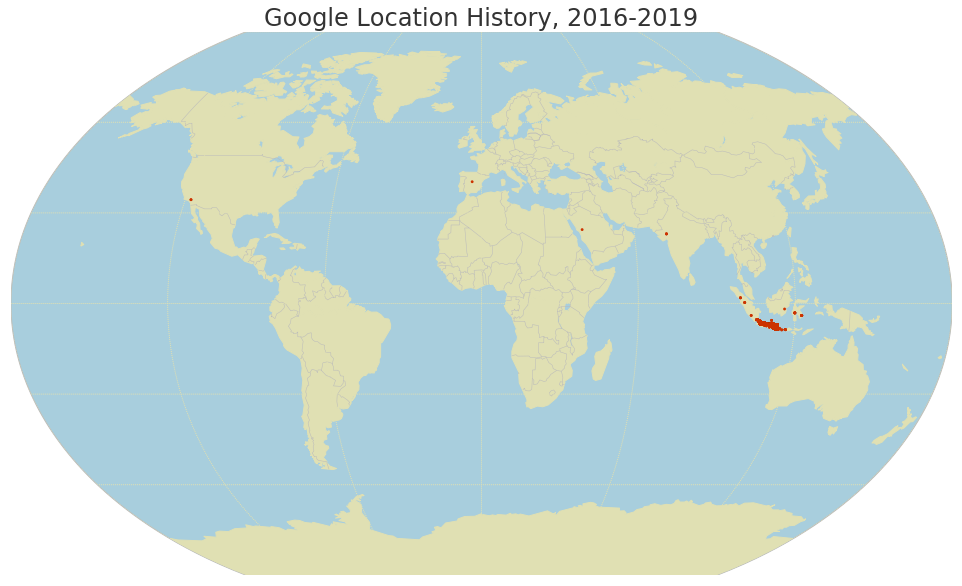

In [55]:
import os
os.environ["PROJ_LIB"] = "D:\Anaconda\Library\share"
from mpl_toolkits.basemap import Basemap

# create the plot
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, facecolor='#ffffff', frame_on=False)
ax.set_title('Google Location History, {}'.format(date_range), fontsize=24, color='#333333')

# draw the basemap and its features
m = Basemap(projection='kav7', lon_0=0, resolution='c', area_thresh=10000)
m.drawmapboundary(color=border_color, fill_color=water_color)
m.drawcoastlines(color=coastline_color)
m.drawcountries(color=border_color)
m.fillcontinents(color=land_color, lake_color=water_color)
m.drawparallels(np.arange(-90., 120., 30.), color=meridian_color)
m.drawmeridians(np.arange(0., 420., 60.), color=meridian_color)

# project the location history points then scatter plot them
x, y = m(df_gps['lon'].values, df_gps['lat'].values)
m.scatter(x, y, s=8, color=marker_fill_color, edgecolor=marker_edge_color, alpha=1, zorder=3)

# show the map
plt.savefig('C:/Users/Romansya/Loc history/my_google_location_history_world_map.png', dpi=96, bbox_inches='tight', pad_inches=0.2)
plt.show()

Focusing to Java (Indonesia) only

In [56]:
# define a transverse mercator projection for Java
map_width_m = 1200 * 1000
map_height_m = 900 * 1000
target_crs = {'datum':'WGS84',
              'ellps':'WGS84',
              'proj':'tmerc',
              'lon_0':110.2578,
              'lat_0':-7.3017}

# define how the annotations should look
color = 'k'
weight = 'black'
size = 9
alpha = 0.3
xycoords = 'axes fraction'

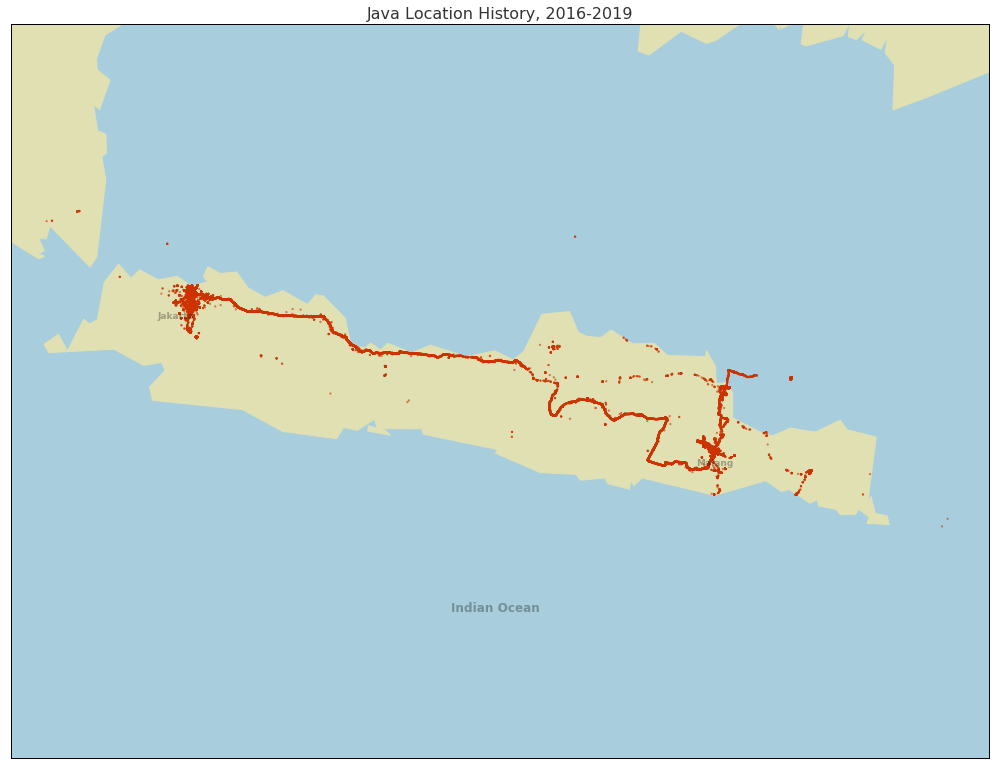

In [57]:
# plot the map
fig_width = 18
fig = plt.figure(figsize=[fig_width, fig_width * map_height_m / float(map_width_m)])
ax = fig.add_subplot(111, facecolor='#ffffff', frame_on=False)
ax.set_title('Java Location History, {}'.format(date_range), fontsize=16, color='#333333')

m = Basemap(ellps=target_crs['ellps'],
            projection=target_crs['proj'],
            lon_0=target_crs['lon_0'], 
            lat_0=target_crs['lat_0'],
            width=map_width_m, 
            height=map_height_m,
            resolution='l',
            area_thresh=10000)

m.drawcoastlines(color=coastline_color)
m.drawcountries(color=border_color)
m.fillcontinents(color=land_color, lake_color=water_color)
m.drawstates(color=border_color)
m.drawmapboundary(fill_color=water_color)

x, y = m(df_gps['lon'].values, df_gps['lat'].values)
m.scatter(x, y, s=5, color=marker_fill_color, edgecolor=marker_edge_color, alpha=0.6, zorder=3)

# annotate some cities 
plt.annotate('Malang', xy=(0.7, 0.4), xycoords=xycoords, color=color, weight=weight, size=size, alpha=alpha)
plt.annotate('Jakarta', xy=(0.15, 0.6), xycoords=xycoords, color=color, weight=weight, size=size, alpha=alpha)

plt.annotate('Indian Ocean', xy=(0.45, 0.2), xycoords=xycoords, color='black', weight=weight, size=12, alpha=alpha)

plt.savefig('C:/Users/Romansya/Loc history/my_google_location_history_java_map.png', dpi=300, bbox_inches='tight', pad_inches=0.2)
plt.show()

Most red dots come from Jakarta (my current place) and Malang (my hometown).
The red line connecting them is my travel by train (Kereta Api Indonesia).

In [58]:
# define a transverse mercator projection for Jakarta
map_width_m = 150 * 300
map_height_m = 150 * 300
target_crs = {'datum':'WGS84',
              'ellps':'WGS84',
              'proj':'tmerc',
              'lon_0':106.84513,
              'lat_0':-6.21462}

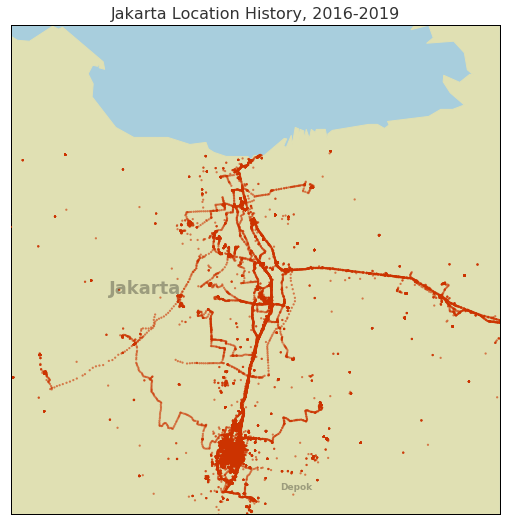

In [59]:
# plot the map
fig_width = 9
fig = plt.figure(figsize=[fig_width, fig_width * map_height_m / float(map_width_m)])
ax = fig.add_subplot(111, facecolor='#ffffff', frame_on=False)
ax.set_title('Jakarta Location History, {}'.format(date_range), fontsize=16, color='#333333')

m = Basemap(ellps=target_crs['ellps'],
            projection=target_crs['proj'],
            lon_0=target_crs['lon_0'], 
            lat_0=target_crs['lat_0'],
            width=map_width_m, 
            height=map_height_m,
            resolution='h',
            area_thresh=10)

m.drawcoastlines(color=coastline_color)
m.drawcountries(color=border_color)
m.fillcontinents(color=land_color, lake_color=water_color)
m.drawstates(color=border_color)
m.drawmapboundary(fill_color=water_color)

x, y = m(df_gps['lon'].values, df_gps['lat'].values)
m.scatter(x, y, s=5, color=marker_fill_color, edgecolor=marker_edge_color, alpha=0.6, zorder=3)

# annotate some cities
plt.annotate('Jakarta', xy=(0.2, 0.45), xycoords=xycoords, color=color, weight=weight, size=18, alpha=alpha)
plt.annotate('Depok', xy=(0.55, 0.05), xycoords=xycoords, color=color, weight=weight, size=size, alpha=alpha)

plt.savefig('C:/Users/Romansya/Loc history/my_google_location_history_jakarta_map.png', dpi=300, bbox_inches='tight', pad_inches=0.2)
plt.show()

In [60]:
# define a transverse mercator projection for Malang
map_width_m = 150 * 200
map_height_m = 150 * 200
target_crs = {'datum':'WGS84',
              'ellps':'WGS84',
              'proj':'tmerc',
              'lon_0':112.621391,
              'lat_0':-7.983908}

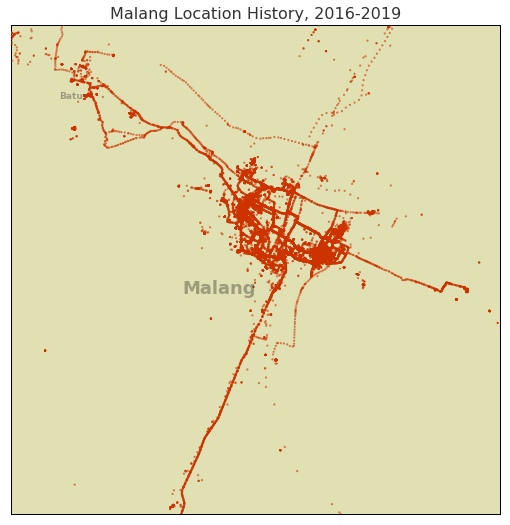

In [61]:
# plot the map
fig_width = 9
fig = plt.figure(figsize=[fig_width, fig_width * map_height_m / float(map_width_m)])
ax = fig.add_subplot(111, facecolor='#ffffff', frame_on=False)
ax.set_title('Malang Location History, {}'.format(date_range), fontsize=16, color='#333333')

m = Basemap(ellps=target_crs['ellps'],
            projection=target_crs['proj'],
            lon_0=target_crs['lon_0'], 
            lat_0=target_crs['lat_0'],
            width=map_width_m, 
            height=map_height_m,
            resolution='h',
            area_thresh=10)

m.drawcoastlines(color=coastline_color)
m.drawcountries(color=border_color)
m.fillcontinents(color=land_color, lake_color=water_color)
m.drawstates(color=border_color)
m.drawmapboundary(fill_color=water_color)

x, y = m(df_gps['lon'].values, df_gps['lat'].values)
m.scatter(x, y, s=5, color=marker_fill_color, edgecolor=marker_edge_color, alpha=0.6, zorder=3)

# annotate some cities
plt.annotate('Malang', xy=(0.35, 0.45), xycoords=xycoords, color=color, weight=weight, size=18, alpha=alpha)
plt.annotate('Batu', xy=(0.1, 0.85), xycoords=xycoords, color=color, weight=weight, size=size, alpha=alpha)

plt.savefig('C:/Users/Romansya/Loc history/my_google_location_history_malang_map.png', dpi=300, bbox_inches='tight', pad_inches=0.2)
plt.show()